In [393]:
import pandas as pd

In [394]:
df = pd.read_csv('insurance.csv')

In [395]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [396]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [397]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [398]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [399]:
df = df.join(pd.get_dummies(df.region, dtype=int)).drop('region', axis=1)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

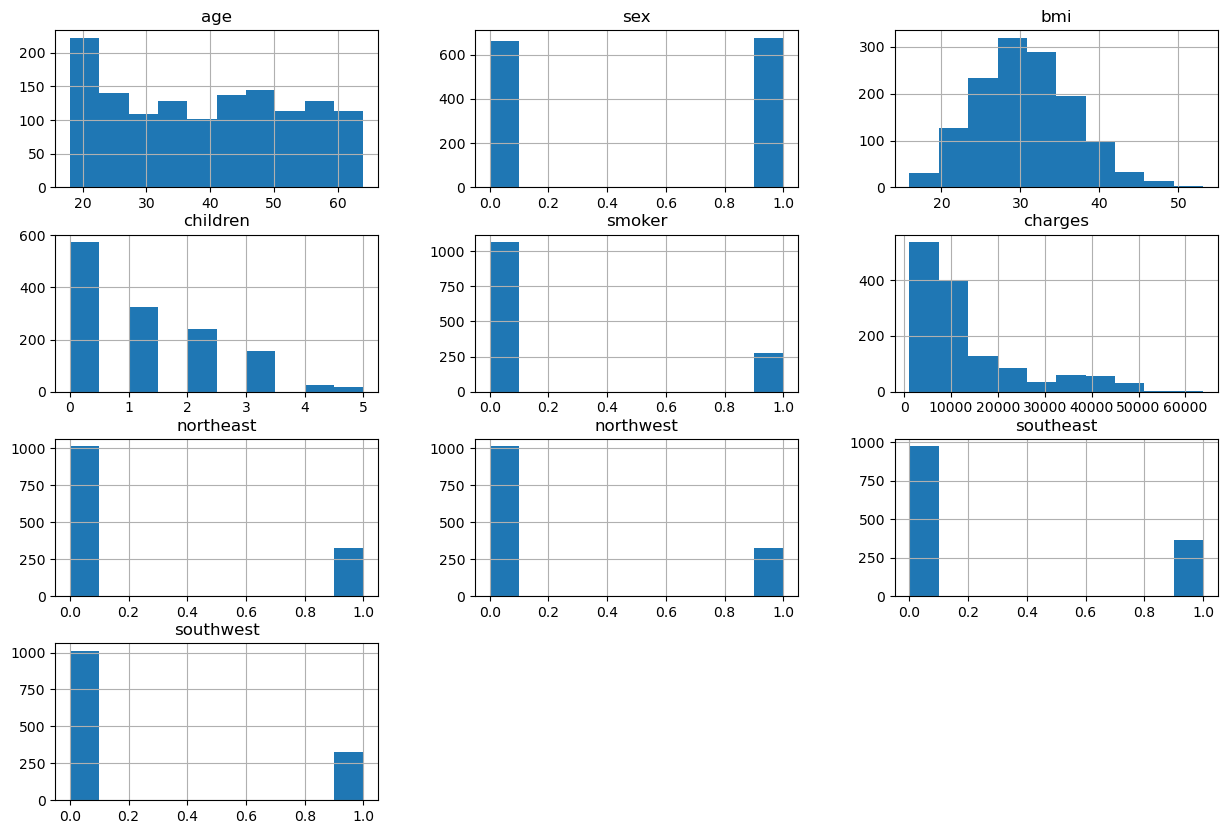

In [400]:
df.hist( figsize=(15,10))

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   int32  
 7   northwest  1338 non-null   int32  
 8   southeast  1338 non-null   int32  
 9   southwest  1338 non-null   int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 83.8 KB


<Axes: >

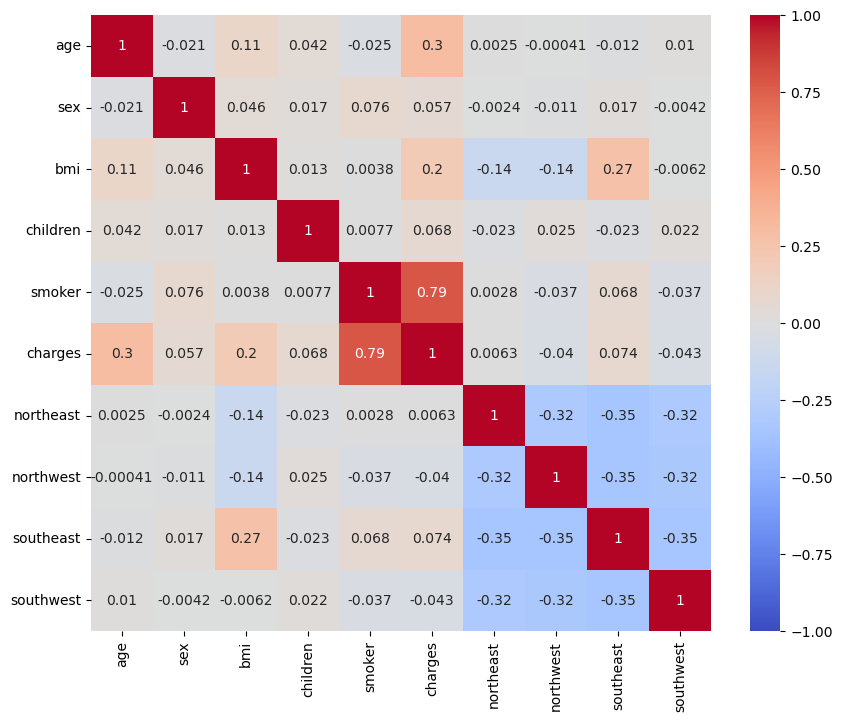

In [402]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin =-1, vmax=1)

In [403]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

x = df.drop('charges', axis=1)
y= df['charges']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [404]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1)

In [405]:
model.score(X_test, y_test)

0.8565734448221796

In [406]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test,y_pred)
rmse

4281.584465624574

In [407]:
df.charges.std()

12110.011236693994

In [408]:
y_test.std()

11326.650464096676

In [409]:
df.charges.median()

9382.033

In [410]:
mae = mean_absolute_error(y_pred, y_test)
mae

2356.611738541454

Text(0.5, 1.0, 'Prediction vs Truth')

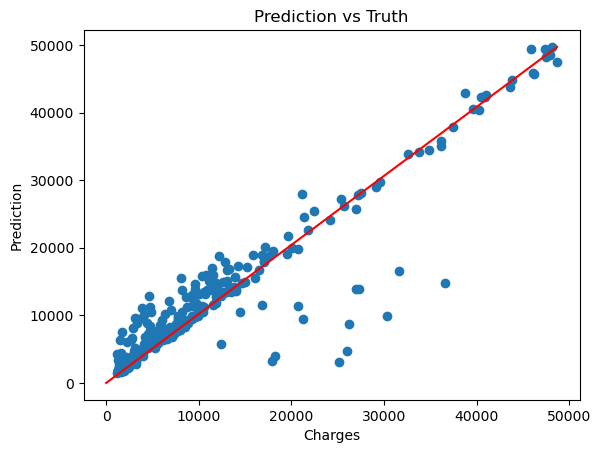

In [411]:
import numpy as np

plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0,max(y_pred)), color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs Truth')

In [412]:
feature_importances = sorted(zip(model.feature_names_in_, model.feature_importances_), key = lambda x:x[1],reverse=True)

Text(0.5, 1.0, 'Feature Importances')

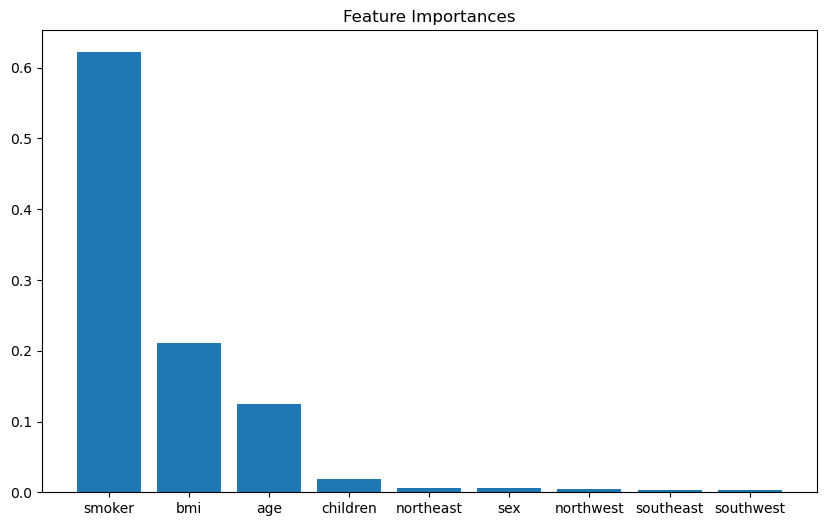

In [413]:
plt.figure(figsize = (10,6) )
plt.bar([x[0] for x in feature_importances], [x[1] for x in feature_importances] )
plt.title("Feature Importances")

In [414]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 2,5],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,4,6]
}

model = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5 )

In [415]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8]})

In [416]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [417]:
model = grid_search.best_estimator_

In [418]:
model

RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_jobs=-1)

In [419]:
model.score(X_test, y_test)

0.8816135291295318

In [420]:
y_pred = model.predict(X_test)

In [421]:
rmse = root_mean_squared_error(y_test, y_pred)
rmse

3889.9208927144086

In [422]:
mae = mean_absolute_error(y_test, y_pred)
mae

2148.414444585641

Text(0.5, 1.0, 'Prediction vs Truth')

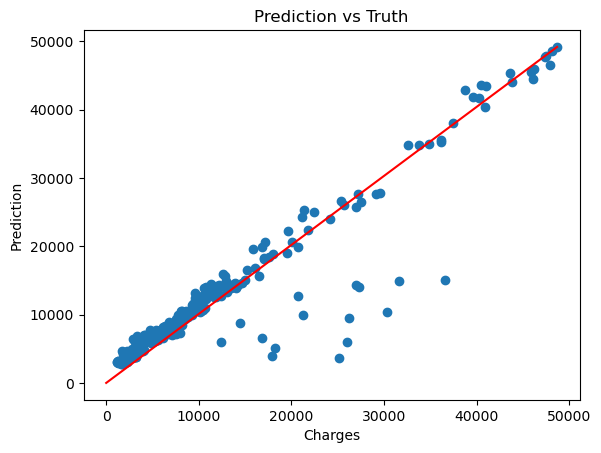

In [423]:

plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0,max(y_pred)), color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs Truth')